In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from decimal import Decimal

In [14]:
#by_60211642
data = pd.read_csv("./코로나바이러스감염증-19_확진환자_발생현황_221126.csv", header = 0)
data.tail(10)

,일자,계(명),국내발생(명),해외유입(명),사망(명),Unnamed: 5,열2,열3,열4,열5,Unnamed: 10,Unnamed: 11
1033,2022.11.18,"49,399","49,333",66,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,2022.11.19,"50,568","50,518",50,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,2022.11.20,"45,998","45,940",58,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,2022.11.21,"23,077","23,016",61,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,2022.11.22,"72,860","72,779",81,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,2022.11.23,"70,306","70,237",69,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,2022.11.24,"59,082","59,027",55,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,2022.11.25,"53,698","53,659",39,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,2022.11.26,"52,788","52,726",62,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,누적(명),"26,890,488","26,819,311","71,177","30,330",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 맥 개발환경 한국어 설정을 위함.
import matplotlib as mpl
#by_60211642
print(mpl.matplotlib_fname())

# 맥 개발환경 한국어 설정을 위함.
font_path="./NanumGothicBold.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
#by_60211642

/Users/jieunsong/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [18]:
df_covid = data.loc[:,['일자','계(명)','사망(명)']][:1042]
df_covid3 = data.loc[:,['일자','계(명)','사망(명)']][57:1042]
df_accumulate = data.loc[:,['일자','계(명)','사망(명)']][1042:1043] 

df_covid.isna().sum()
df_covid = df_covid.replace("-", 0).set_index('일자')

In [19]:
#누적 확진자 수 구하는 코드
df_covid["누적 확진자 수"] = df_covid["계(명)"]
def cumulative_number(i):
    if i == 0:
        df_covid["누적 확진자 수"][0] = int(df_covid["계(명)"][0])
    else:
        if type(df_covid["계(명)"][i]) != int :
            p = df_covid["계(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["계(명)"][i] = int(str_confirmed)
            
        df_covid["누적 확진자 수"][i] = int(df_covid["누적 확진자 수"][i-1]) + df_covid["계(명)"][i]

for i in range(len(df_covid)):
    cumulative_number(i)

In [20]:
#누적 사망자 수 구하는 코드
df_covid["누적 사망자 수"] = df_covid["계(명)"]
def cumulative_number2(i):
    if i == 0:
        df_covid["누적 사망자 수"][0] = int(df_covid["사망(명)"][0])
    else:
        if type(df_covid["사망(명)"][i]) != int :
            p = df_covid["사망(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["사망(명)"][i] = int(str_confirmed)
            
        df_covid["누적 사망자 수"][i] = int(df_covid["누적 사망자 수"][i-1]) + df_covid["사망(명)"][i]

for i in range(len(df_covid)):
    cumulative_number2(i)

In [21]:
#감염률 구하는 코드
df_covid["감염률"] = df_covid["계(명)"]
def infection_rate(i):
    rok_pop = 51628117
    if i == 0:
        df_covid["감염률"][0] = int(df_covid["계(명)"][0])/rok_pop
    else:
        #분모 (전체 국민 - 당일의 누적 확진자 수)
        denominator = (rok_pop - df_covid["누적 확진자 수"][i-1])
        #분자 (당일의 확진자 수)
        numerator = df_covid["계(명)"][i]
        p_infection = numerator/denominator
        df_covid["감염률"][i] = p_infection
            
    
for i in range(len(df_covid)):
    infection_rate(i)

In [22]:
#치명률 구하는 코드
df_covid["치명률"] = df_covid["누적 사망자 수"]
def death_rate(i):
    if i <17:
        #이러면 초기 17일 치명률은 또 outlier 처리 필요함. (by60211642) -> 왜? : 치명률이 이미 들어간 상태로 결과 값이 나와 있는데 
        # 이전의 치명률이기 때문에 잘라야함.
        df_covid["치명률"][0] = 0
    else:
        #분자 (누적 사망자 수)
        #분모 (17일 전 누적 확진자 수)
        p_lethality = int(df_covid["누적 사망자 수"][i])/int(df_covid["누적 확진자 수"][i-17])
        df_covid["치명률"][i] = p_lethality
            
    
for i in range(len(df_covid)):
    death_rate(i)

In [24]:
#column 이름 명확하게 바꿈 (by60211642)
df_covid.rename(columns = {'계(명)':'일일 확진자 수'}, inplace=True)
df_covid.rename(columns = {'사망(명)':'일일 사망자 수'}, inplace=True)

# 신천지 집단 감염 사태와 코로나 유행 초기인 걸 생각했을 때 앞부분 데이터가 신뢰도가 떨어질 것.
# 신천지 사태 한 달 후인 3월 17일 이후 데이터만 사용하는게 치명률에서 이상치를 줄일 수 있을 것이라 생각.
# 이름이 의미를 가지게 수정(by60211642)
df_covid_rmOutlier = df_covid.loc['2020.3.17':]
df_covid_rmOutlier.head(10)

,일일 확진자 수,일일 사망자 수,누적 확진자 수,누적 사망자 수,감염률,치명률
일자,,,,,,
2020.3.17,84,6,8320,81,0.000002,0.027636
2020.3.18,93,3,8413,84,0.000002,0.023823
2020.3.19,152,7,8565,91,0.000003,0.021605
2020.3.20,87,3,8652,94,0.000002,0.019534
2020.3.21,147,8,8799,102,0.000003,0.019144
2020.3.22,98,2,8897,104,0.000002,0.018037
2020.3.23,64,7,8961,111,0.000001,0.017664
2020.3.24,76,9,9037,120,0.000001,0.017733
2020.3.25,100,6,9137,126,0.000002,0.017662


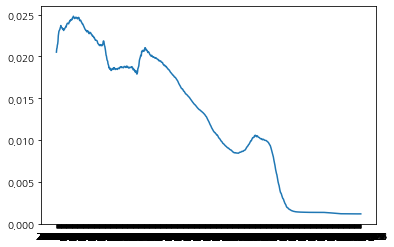

In [25]:
#치명률 그래프로 확인
plt.plot(df_covid3['일자'][16:], df_covid_rmOutlier['치명률'][16:])
plt.show()

#우세종에 따른 데이터 구간 나누기 -> 기타, delta, omi 이렇게 3가지로 나눴음. 결국은 초기 치명률은 outlier
#: 우리가 본 data에서는 신천지 집단 감염 때문에 나왔기 때문에 제거 필요. (by 60211642) -> 우리 data에서는 유의미하게 값이 달라지지는 않음
df_covid_etc = df_covid_rmOutlier.loc['2020.4.2':"2021.7.31"]
df_covid_delta = df_covid_rmOutlier.loc["2021.8.1":"2022.1.24"]
df_covid_omi = df_covid_rmOutlier.loc["2022.1.25":]

In [31]:
#1 감염률 데이터 분석 
#타입변환
df_covid_etc = df_covid_etc.astype({'감염률' : 'float'})
df_covid_delta = df_covid_delta.astype({'감염률' : 'float'})
df_covid_omi = df_covid_omi.astype({'감염률' : 'float'})

In [30]:
#정규성 검증
print("[1. 감염률 데이터 분석]")
print("[감염률 정규성 검증]")
test_stat, p_val = stats.shapiro(df_covid_etc["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()
print("[감염률 등분산 검증]")
# 정규분포 아닐 시 bartlett사용 불가 -> non-parametric method인 fligner test 사용(by 60211642)
test_stat, p_val = stats.fligner(df_covid_etc["감염률"],df_covid_delta["감염률"],df_covid_omi["감염률"])
print("Fligner Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()
#정규성을 만족하지 않으므로 Kruskal-Wallis Test 실행
#ks test
print("[감염률 Kruskal-Wallis Test]")
test_stat, p_val = stats.kruskal(df_covid_etc["감염률"], df_covid_delta["감염률"], df_covid_omi["감염률"])
print("Kruskal-Wallis Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

[1. 감염률 데이터 분석]
[감염률 정규성 검증]
Shapiro Test-statistics : 0.8539105653762817, p-value : 7.790196369742615e-21
Shapiro Test-statistics : 0.835544228553772, p-value : 7.48299046424844e-13
Shapiro Test-statistics : 0.805178165435791, p-value : 7.125169911372918e-19

[감염률 등분산 검증]
Fligner Test-statistics : 683.7901745808464, p-value : 3.2873822050209747e-149

[감염률 Kruskal-Wallis Test]
Kruskal-Wallis Test-statistics : 804.3463264524516, p-value : 2.1797889228493447e-175



In [32]:
#2 치명률 데이터 분석 
print("[2. 치명률 데이터 분석]")
#타입변환
df_covid_etc = df_covid_etc.astype({'치명률' : 'float'})
df_covid_delta = df_covid_delta.astype({'치명률' : 'float'})
df_covid_omi = df_covid_omi.astype({'치명률' : 'float'})

#정규성 검증
print("[치명률 정규성 검증]")
test_stat, p_val = stats.shapiro(df_covid_etc["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

#등분산 검증
print("[치명률 등분산 검증]")
# 정규분포 아닐 시 bartlett사용 불가 -> non-parametric method인 fligner test 사용(by 60211642)
test_stat, p_val = stats.fligner(df_covid_etc["치명률"],df_covid_delta["치명률"],df_covid_omi["치명률"])
print("Fligner Test-statistics : {}, p-value : {}".format(test_stat, p_val))

#정규성을 만족하지 않으므로 Kruskal-Wallis Test 실행
#ks test
print("[치명률 Kruskal-Wallis Test]")
test_stat, p_val = stats.kruskal(df_covid_etc["치명률"], df_covid_delta["치명률"], df_covid_omi["치명률"])
print("Kruskal-Wallis Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

[2. 치명률 데이터 분석]
[치명률 정규성 검증]
Shapiro Test-statistics : 0.9608435034751892, p-value : 4.450002033529188e-10
Shapiro Test-statistics : 0.9434995055198669, p-value : 1.8121364746548352e-06
Shapiro Test-statistics : 0.5536781549453735, p-value : 3.1924320684309763e-27

[치명률 등분산 검증]
Fligner Test-statistics : 148.9384212608489, p-value : 4.554416576790575e-33
[치명률 Kruskal-Wallis Test]
Kruskal-Wallis Test-statistics : 798.2136625406547, p-value : 4.678487671713772e-174

